# 1. Import necessary packages

In [5]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import scipy.stats as stats
from scipy.stats import skew, norm
%matplotlib inline
from numpy.random import seed


# 2. Load Data

In [6]:
# Uploading data files 


bcpred = pd.read_csv('Breast_cancer_data.csv')
bcpred.head()


,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0
1,20.57,17.77,132.90,1326.0,0.08474,0
2,19.69,21.25,130.00,1203.0,0.10960,0
3,11.42,20.38,77.58,386.1,0.14250,0
4,20.29,14.34,135.10,1297.0,0.10030,0


# 3. Data Definition 

In [7]:
bcpred.shape

(569, 6)

In [8]:
# Check column names
bcpred.columns

Index(['mean_radius', 'mean_texture', 'mean_perimeter', 'mean_area',
       'mean_smoothness', 'diagnosis'],
      dtype='object')

In [9]:
# Data types
bcpred.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   mean_radius      569 non-null    float64
 1   mean_texture     569 non-null    float64
 2   mean_perimeter   569 non-null    float64
 3   mean_area        569 non-null    float64
 4   mean_smoothness  569 non-null    float64
 5   diagnosis        569 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 26.8 KB


In [10]:
# Summary Stats
bcpred.describe()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,1.000000


# 4. Duplication & Missing Values Check

In [11]:
# Checking for null values
bcpred.isnull().values.any()

False

In [12]:
# Checking for not null values
bcpred.notnull()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis
0,True,True,True,True,True,True
1,True,True,True,True,True,True
2,True,True,True,True,True,True
3,True,True,True,True,True,True
4,True,True,True,True,True,True
...,...,...,...,...,...,...
564,True,True,True,True,True,True
565,True,True,True,True,True,True
566,True,True,True,True,True,True
567,True,True,True,True,True,True


In [13]:
# Duplicates check
idsUnique = len(set(bcpred))
idsTotal = bcpred.shape[0]
idsDupli = idsTotal - idsUnique

print('There are ' + str(idsDupli) + ' duplicate IDS for ' + ' total entries')


There are 563 duplicate IDS for  total entries


In [14]:
#Deleting duplicates
bcpred.drop_duplicates()


,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0
1,20.57,17.77,132.90,1326.0,0.08474,0
2,19.69,21.25,130.00,1203.0,0.10960,0
3,11.42,20.38,77.58,386.1,0.14250,0
4,20.29,14.34,135.10,1297.0,0.10030,0
...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0
565,20.13,28.25,131.20,1261.0,0.09780,0
566,16.60,28.08,108.30,858.1,0.08455,0
567,20.60,29.33,140.10,1265.0,0.11780,0


In [15]:
# Checking for missing values
bcpred.isnull()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False
...,...,...,...,...,...,...
564,False,False,False,False,False,False
565,False,False,False,False,False,False
566,False,False,False,False,False,False
567,False,False,False,False,False,False


# 5. EDA - MeanRadius vs. MeanArea

In [16]:
bcpred.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   mean_radius      569 non-null    float64
 1   mean_texture     569 non-null    float64
 2   mean_perimeter   569 non-null    float64
 3   mean_area        569 non-null    float64
 4   mean_smoothness  569 non-null    float64
 5   diagnosis        569 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 26.8 KB


In [17]:
bcpred.mean_radius.describe()

count    569.000000
mean      14.127292
std        3.524049
min        6.981000
25%       11.700000
50%       13.370000
75%       15.780000
max       28.110000
Name: mean_radius, dtype: float64

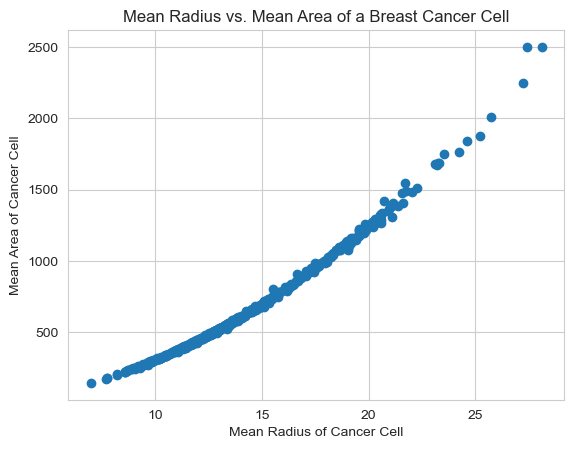

In [24]:
#Comparing the Mean Radius vs. Mean Area to see if there is a correlation in determining whether one has breast cancer or not

plt.scatter(bcpred['mean_radius'], bcpred['mean_area'])
plt.xlabel('Mean Radius of Cancer Cell')
plt.ylabel('Mean Area of Cancer Cell')
plt.title('Mean Radius vs. Mean Area of a Breast Cancer Cell')
plt.show()

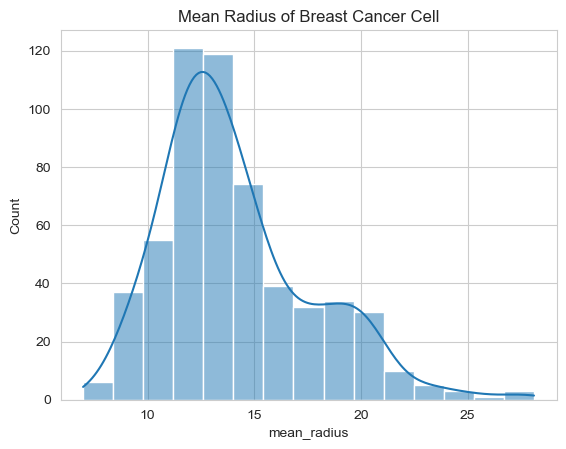

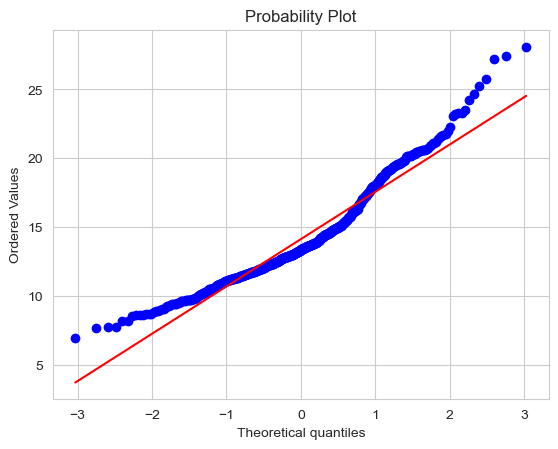

In [27]:
#Making a histogram plot of mean_radius

fig, ax = plt.subplots()
sns.histplot(bcpred['mean_radius'], kde=True, bins=15)
sns.set_style('whitegrid')
ax.set(title='Mean Radius of Breast Cancer Cell')
plt.show()

# QQ-plot
fig = plt.figure()
res = stats.probplot(bcpred['mean_radius'], plot=plt)
plt.show()

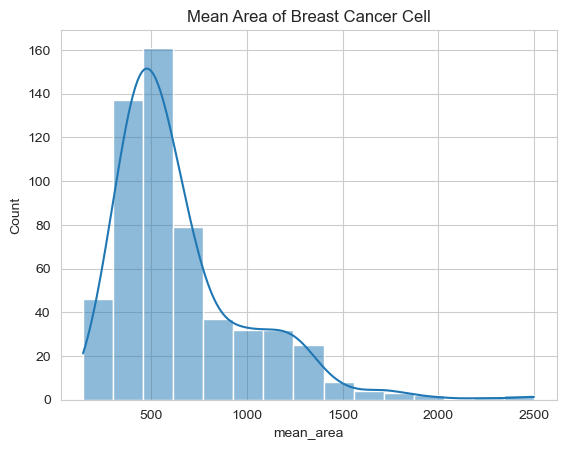

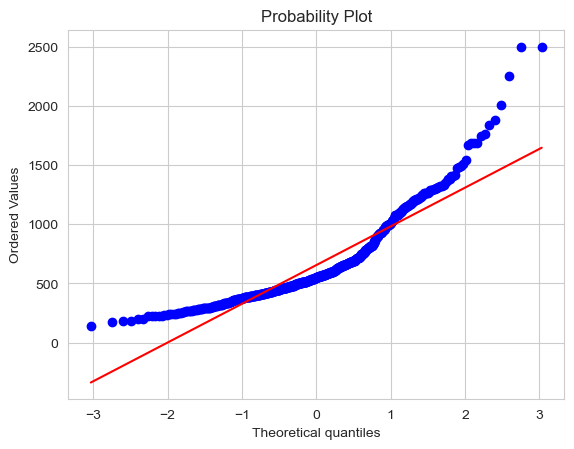

In [28]:
#Making a histogram plot of mean_area

fig, ax = plt.subplots()
sns.histplot(bcpred['mean_area'], kde=True, bins=15)
sns.set_style('whitegrid')
ax.set(title='Mean Area of Breast Cancer Cell')
plt.show()

# QQ-plot
fig = plt.figure()
res = stats.probplot(bcpred['mean_area'], plot=plt)
plt.show()

# 5. Important Numeric Predictions

5.1 Correlations with MeanRadius and MeanArea

In [29]:
num_features = [col for col in bcpred.select_dtypes(exclude = ['object']).columns]

print("There are ", len(num_features), " numeric variables")

There are  6  numeric variables


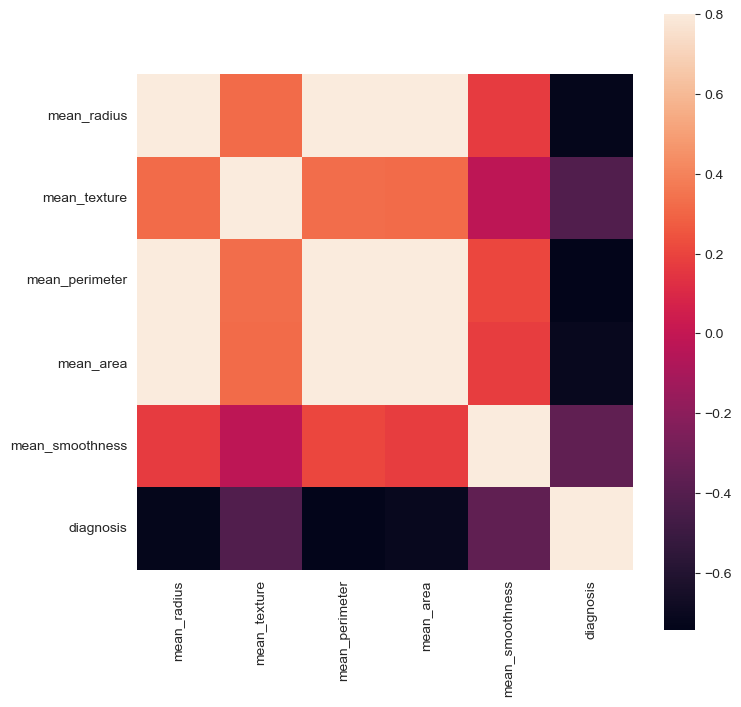

In [35]:
# gaining a view of relationships among the features
corrmat = bcpred.corr()
f, ax = plt.subplots(figsize= (8, 8))
sns.heatmap(corrmat, vmax=.8, square=True);

Looking at the above heatmap, one can see taht there is a strong correlation between mean_radius, and mean_area, and mean_perimeter, which indicates multicollinearity. 

Even with these strong correlations, the others have to be taking into account such as: mean_smoothness and diagnosis. 

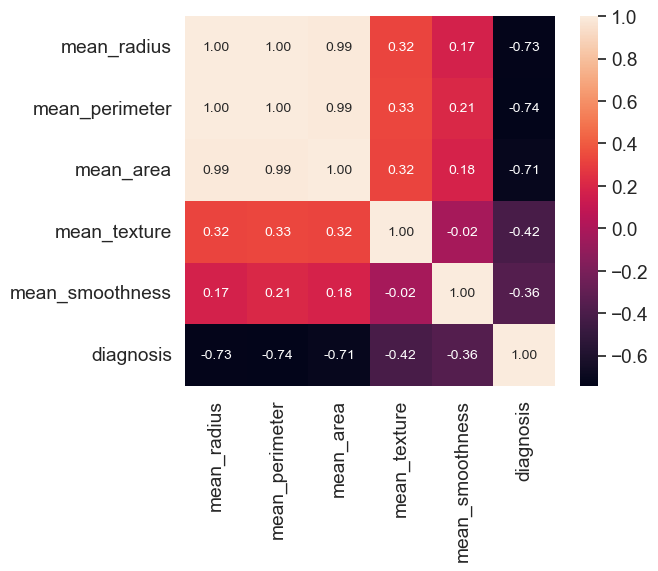

In [38]:
#correlation matrix for mean_radius
k = 11 #number of variables for heatmap
cols = corrmat.nlargest(k, 'mean_radius')['mean_radius'].index
cm = np.corrcoef(bcpred[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

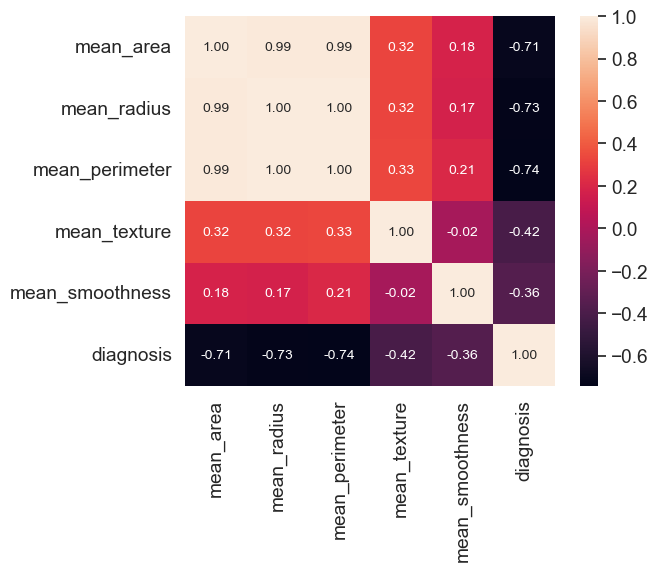

In [39]:
#correlation matrix for mean_area
k = 11 #number of variables for heatmap
cols = corrmat.nlargest(k, 'mean_area')['mean_area'].index
cm = np.corrcoef(bcpred[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

~Looking at both heatmaps for mean_radius and mean_area, there are 6 numerical values of at leat -0.7, which indicates a positive correlation. 


# 5.2 Overall Quality

<AxesSubplot:xlabel='mean_radius', ylabel='mean_area'>

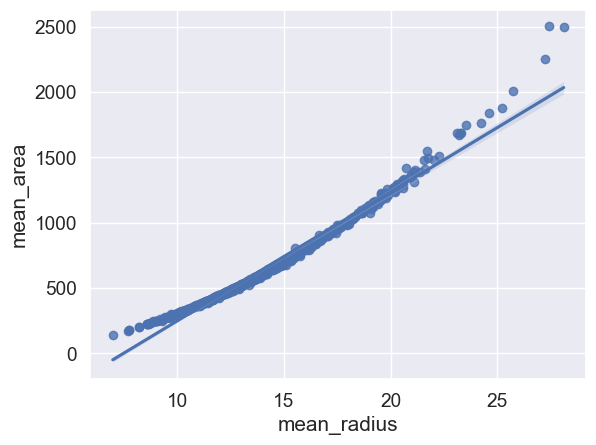

In [44]:
sns.regplot(x=bcpred['mean_radius'], y=bcpred['mean_area'], data=bcpred)


There are no outliers, that stand out, that idicated something different. The 3 outliers on the top-right are of relation to the other data points. 

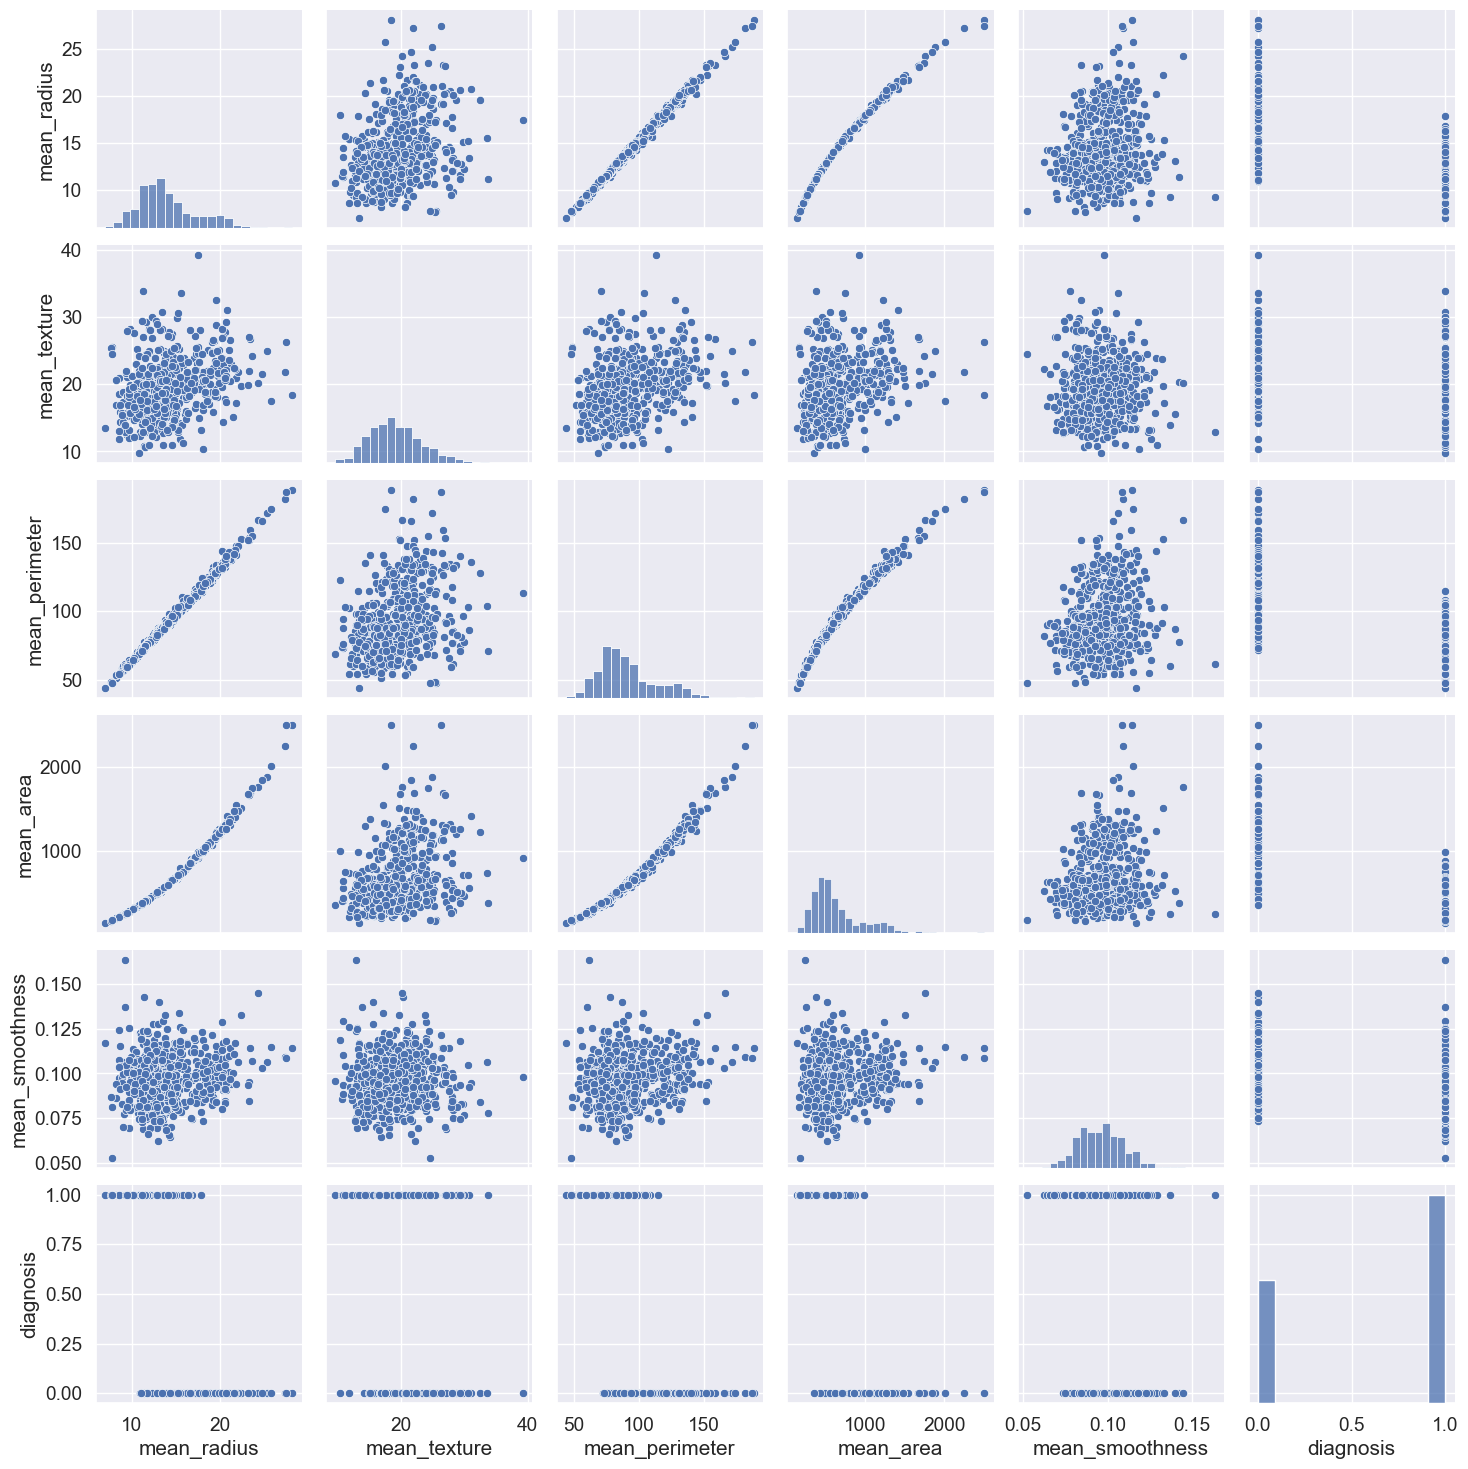

In [46]:
#Pair plot for all numerical variables
sns.pairplot(bcpred, palette='Set1')
plt.show()

# Summary of Correlations & Findings

Overall, looking at all these maps, one can see that there is a positive correlation between mean_area, mean_perimeter, and mean_radius. This indicates the likelihood of detecting breast cancer.  